<h1 align="center">Sentence Transformers: Sentence Embedding, Sentence Similarity, Semantic Search and Clustering |Code</h1>

Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro

Links de estudos:

* [semantic-similarity](https://github.com/abhinavthomas/semantic-similarity)

* [Sentence Transformers](https://www.youtube.com/watch?v=OlhNZg4gOvA)


# Sentence Embeddings

<font color="orange">É o nome coletivo para um conjunto de técnicas em processamento de linguagem natural (NLP) onde as sentenças são mapeadas para vetores de números reais .</font>

Casos de uso:

* Sentence Embedding

* Sentence Similarity

* Semantic Search

* Clustering

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Gerando Embeddings

In [ ]:
!pip install -U sentence-transformers

In [ ]:
#!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer, util

# Carregamos o Modelo pré-treinado ---> https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2
model = SentenceTransformer('neuralmind/bert-large-portuguese-cased') # 'all-MiniLM-L6-v2'  <--- Modelo HF


`all-MiniLM-L6-v2` --> Este é um modelo de Transformers de sentença : ele mapeia sentenças e parágrafos para um espaço vetorial denso de `384` dimensões e pode ser usado para tarefas como agrupamento ou pesquisa semântica.

In [46]:
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 1024, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

In [47]:
sentences = ['Esta framework gera embeddings para cada sentença de entrada.',
             'As sentenças são passadas como uma lista de strings.']


embeddings = model.encode(sentences)

In [48]:
embeddings.shape

(2, 1024)

In [49]:
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")


Sentence: Esta framework gera embeddings para cada sentença de entrada.
Embedding: [ 0.39161238  0.29235005 -0.20401621 ... -0.058189   -0.6304526
  0.33865196]

Sentence: As sentenças são passadas como uma lista de strings.
Embedding: [ 0.7589692   0.5428759  -0.5708151  ...  0.23309363 -0.4231845
  0.03938337]



# Cosine-Similarity

In [50]:
emb1 = model.encode("Eu estou comendo maçã.")
emb2 = model.encode("Eu gosto de frutas.")

cos_sim = util.cos_sim(emb1, emb2)
print("Cosine-Similarity:", cos_sim)

Cosine-Similarity: tensor([[0.8574]])


## Calcula a `similaridade de cosseno` entre todos os pares

<font color="orange">Repara que a seguir comparamos as similaridade entre cada sentença. </font>

Por exemplo:

$[1.0000,  0.7553, -0.1050,  0.2474, -0.0704, -0.0333,  0.1707,  0.0476,
          0.0630]$

Se compara assim: 1_senteça-1_sentença = 1.0000 | 1_senteça-2_sentença = 0.7553 | 1_senteça-3_sentença = -0.1050 | 1_senteça-4_sentença | ...            

In [51]:
# Compute cosine similarity between all pairs
sentences = ['Um homem está comendo comida.',
          'Um homem está comendo um pedaço de pão.',
          'A menina está carregando um bebê.',
          'Um homem está montando um cavalo.',
          'Uma mulher está tocando violino.',
          'Dois homens empurravam carroças pela mata.',
          'Um homem está montando um cavalo branco em um terreno fechado.',
          'Um macaco está tocando bateria.',
          'Alguém fantasiado de gorila está tocando bateria.'
          ]

# Codificamos (Encode) todas as sentences
embeddings = model.encode(sentences)

# Compute cosine similarity between all pairs
cos_sim = util.cos_sim(embeddings, embeddings)

cos_sim

tensor([[1.0000, 0.9389, 0.8362, 0.8468, 0.8045, 0.7375, 0.8408, 0.8608, 0.8190],
        [0.9389, 1.0000, 0.8159, 0.8415, 0.7828, 0.7183, 0.8358, 0.8249, 0.7913],
        [0.8362, 0.8159, 1.0000, 0.7969, 0.7834, 0.6963, 0.8039, 0.8241, 0.8036],
        [0.8468, 0.8415, 0.7969, 1.0000, 0.8024, 0.7509, 0.9367, 0.8450, 0.8030],
        [0.8045, 0.7828, 0.7834, 0.8024, 1.0000, 0.6655, 0.7804, 0.8428, 0.8258],
        [0.7375, 0.7183, 0.6963, 0.7509, 0.6655, 1.0000, 0.7964, 0.7513, 0.7376],
        [0.8408, 0.8358, 0.8039, 0.9367, 0.7804, 0.7964, 1.0000, 0.8625, 0.8258],
        [0.8608, 0.8249, 0.8241, 0.8450, 0.8428, 0.7513, 0.8625, 1.0000, 0.9015],
        [0.8190, 0.7913, 0.8036, 0.8030, 0.8258, 0.7376, 0.8258, 0.9015, 1.0000]])

In [52]:
# Adicionamos todos os pares a uma lista com sua pontuação de similaridade de cosseno
all_sentence_combinations = []

for i in range(len(cos_sim)-1):
    for j in range(i + 1, len(cos_sim)):
        all_sentence_combinations.append((cos_sim[i][j], i, j))
all_sentence_combinations       


[(tensor(0.9389), 0, 1),
 (tensor(0.8362), 0, 2),
 (tensor(0.8468), 0, 3),
 (tensor(0.8045), 0, 4),
 (tensor(0.7375), 0, 5),
 (tensor(0.8408), 0, 6),
 (tensor(0.8608), 0, 7),
 (tensor(0.8190), 0, 8),
 (tensor(0.8159), 1, 2),
 (tensor(0.8415), 1, 3),
 (tensor(0.7828), 1, 4),
 (tensor(0.7183), 1, 5),
 (tensor(0.8358), 1, 6),
 (tensor(0.8249), 1, 7),
 (tensor(0.7913), 1, 8),
 (tensor(0.7969), 2, 3),
 (tensor(0.7834), 2, 4),
 (tensor(0.6963), 2, 5),
 (tensor(0.8039), 2, 6),
 (tensor(0.8241), 2, 7),
 (tensor(0.8036), 2, 8),
 (tensor(0.8024), 3, 4),
 (tensor(0.7509), 3, 5),
 (tensor(0.9367), 3, 6),
 (tensor(0.8450), 3, 7),
 (tensor(0.8030), 3, 8),
 (tensor(0.6655), 4, 5),
 (tensor(0.7804), 4, 6),
 (tensor(0.8428), 4, 7),
 (tensor(0.8258), 4, 8),
 (tensor(0.7964), 5, 6),
 (tensor(0.7513), 5, 7),
 (tensor(0.7376), 5, 8),
 (tensor(0.8625), 6, 7),
 (tensor(0.8258), 6, 8),
 (tensor(0.9015), 7, 8)]

In [53]:
# Lista de classificação pela maior pontuação de similaridade de cosseno
all_sentence_combinations = sorted(all_sentence_combinations, key=lambda x: x[0], reverse=True)

print("Os 5 pares mais semelhantes: ")
for score, i, j in all_sentence_combinations[0: 5]:
    print("{} \t {} \t {:.4f}".format(sentences[i], sentences[j], cos_sim[i][j]))
    

Os 5 pares mais semelhantes: 
Um homem está comendo comida. 	 Um homem está comendo um pedaço de pão. 	 0.9389
Um homem está montando um cavalo. 	 Um homem está montando um cavalo branco em um terreno fechado. 	 0.9367
Um macaco está tocando bateria. 	 Alguém fantasiado de gorila está tocando bateria. 	 0.9015
Um homem está montando um cavalo branco em um terreno fechado. 	 Um macaco está tocando bateria. 	 0.8625
Um homem está comendo comida. 	 Um macaco está tocando bateria. 	 0.8608


# Pesquisa Semântica

<font color="orange">A pesquisa semântica denota a pesquisa com significado, diferente da `pesquisa lexical`, na qual o mecanismo de pesquisa procura correspondências literais das palavras de consulta ou variantes delas, sem entender o significado geral da consulta.</font>



Entãop, a `pesquisa semântica` descreve a tentativa de um mecanismo de pesquisa de gerar os resultados SERP (`Search Engine Results Page`) mais precisos possíveis, com base na intenção do pesquisador, no contexto da consulta e na relação entre as palavras . Isso é importante porque: As pessoas dizem coisas e questionam coisas de diferentes maneiras, idiomas e tons.

In [54]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('neuralmind/bert-large-portuguese-cased') # 'clips/mfaq'   |  Modelo pré-treinado do HuggingFace --> https://huggingface.co/clips/mfaq


Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/neuralmind_bert-large-portuguese-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<font color="orange">`MFAQ` é um modelo de recuperação de FAQ multilíngue treinado no conjunto de dados MFAQ , que classifica as respostas dos candidatos de acordo com uma determinada pergunta.</font>


<font color="orange">Você pode usar o MFAQ com `Transformers` de sentença ou diretamente com um modelo HuggingFace. Em ambos os casos, as perguntas precisam ser precedidas por `<Q>`, e as respostas por `<A>`.</font>

In [55]:
question = "<Q>Quantos modelos posso hospedar no HuggingFace?"

answer_1 = "<A>Todos os planos vêm com modelos e conjuntos de dados privados ilimitados."
answer_2 = "<A>O AutoNLP é uma maneira automática de treinar e implantar modelos de PNL de última geração, perfeitamente integrados ao ecossistema Hugging Face."
answer_3 = "<A>Com base na quantidade de dados de treinamento e variantes de modelo criados, enviamos a você um custo de computação e um link de pagamento - tão baixo quanto $10 por trabalho."


query_embedding = model.encode(question)
corpus_embeddings = model.encode([answer_1, answer_2, answer_3])


print(util.semantic_search(query_embedding, corpus_embeddings))


[[{'corpus_id': 1, 'score': 0.862855076789856}, {'corpus_id': 0, 'score': 0.8545333743095398}, {'corpus_id': 2, 'score': 0.8511956334114075}]]


<font color="orange">Outro exemplo a seguir seria obter a resposta em si. Por isso devemos ter bem claro os conceitos de que uma coisa é a pesquisa semântica e outra coisa é encontrar a resposta dentro do texto mesmo (o qual é a resposta mesmo). Vejamos o exemplo a seguir:</font>

In [56]:
# Ver o seguinte Link do HuggingFace ---> https://huggingface.co/tasks/question-answering

from transformers import pipeline


qa_model = pipeline("question-answering")

question = "Eddy, onde você estudo?"
context = "Olá, eu sou Cientista de Dados e trabalho numa empresa de Tecnologia. Eu estudei na UFES de Vitória."


No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [57]:
qa_model(question = question, context = context)


{'score': 0.15398772060871124,
 'start': 70,
 'end': 99,
 'answer': 'Eu estudei na UFES de Vitória'}

<font color="pink">A pesquisa semântica me ajuda a restringuir muitos docuemtnso e não ter que procurar a resposta em todos os documentos. Vejamos o uso deste `pipeline` aplicado a nosso exemplo anterior:</font>

In [60]:
from transformers import pipeline


qa_model = pipeline("question-answering")


question = "Quantos modelos posso hospedar no HuggingFace?"
context = "Todos os planos vêm com modelos e conjuntos de dados privados ilimitados."


qa_model(question = question, context = context)

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.037184614688158035,
 'start': 47,
 'end': 72,
 'answer': 'dados privados ilimitados'}

# Clustering

In [61]:
from sklearn.cluster import KMeans
import numpy as np


embedder = SentenceTransformer('neuralmind/bert-large-portuguese-cased') # 'all-MiniLM-L6-v2'


# Corpus com frases de exemplo
corpus = ['Um homem está comendo comida.',
          'Um homem está comendo um pedaço de pão.',
          'O cavalo está comendo grama.',
          'Um homem está comendo macarrão.',
          'Uma mulher está comendo Arroz indiano.',
          'A menina está carregando um bebê.',
          'O bebê é carregado pela mulher.',
          'Um homem está montando um cavalo.',
          'Um homem está montando um cavalo branco em um terreno fechado.',
          'Um macaco está tocando bateria.',
          'Alguém fantasiado de gorila está tocando bateria.',
          'Uma chita está correndo atrás de sua presa.',
          'Uma chita persegue a presa através de um campo.',
          'A chita está perseguindo um homem que está montando o cavalo.',
          'Homem e mulher com seu bebê estão assistindo a um guepardo no zoológico.'
          ]


corpus_embeddings = embedder.encode(corpus)

# Normalize as incorporações para o comprimento da unidade
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)
 

Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/neuralmind_bert-large-portuguese-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [62]:
len(corpus_embeddings[0])


1024

In [63]:
len(corpus_embeddings[1])

1024

In [64]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


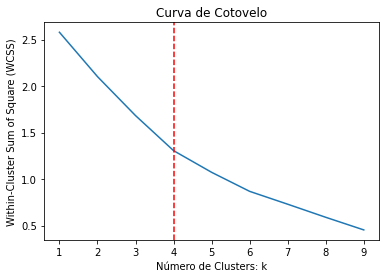

In [65]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from kneed import KneeLocator

# Seus dados
X = corpus_embeddings

# Lista para armazenar valores de WCSS para cada k
wcss = []

# Iterar para diferentes valores de k
for k in range(1, 10):
    # Ajustar o modelo KMeans com k clusters
    kmeans = KMeans(n_clusters=k,  init='k-means++', max_iter=300, tol=1e-4, n_init=30, algorithm='elkan', random_state=0)
    kmeans.fit(X)
    # Adicionar o WCSS ao final da lista wcss
    wcss.append(kmeans.inertia_)

# Encontrar o número ideal de clusters usando o KneeLocator
kneedle = KneeLocator(range(1, 10), wcss, curve='convex', direction='decreasing')
num_clusters = kneedle.elbow

# Plotar a curva de cotovelo com a linha vertical no número ideal de clusters
plt.plot(range(1, 10), wcss)
plt.axvline(x=num_clusters, color='red', linestyle='--')
plt.title('Curva de Cotovelo')
plt.xlabel('Número de Clusters: k')
plt.ylabel('Within-Cluster Sum of Square (WCSS)')
plt.show()

In [69]:
# source: https://stackoverflow.com/questions/55619176/how-to-cluster-similar-sentences-using-bert

clustering_model = KMeans(n_clusters=4)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_


print(cluster_assignment)


[1 1 0 1 1 3 3 0 0 0 0 2 2 0 0]


In [70]:
from sklearn.metrics import silhouette_score
'''
Silhueta é uma métrica de similaridade de cada instância em relação a seu próprio cluster em comparação com outros clusters.
Vária de [-1, 1]. 1 --> Instâncias bem agrupadas & -1 --> Agrupamentos fracos.
Para Clusterização não-supervisionada.
'''

silhouette_score = silhouette_score(X, cluster_assignment)

print("Score Silhueta:", silhouette_score)

Score Silhueta: 0.20523378


In [71]:
clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []

    clustered_sentences[cluster_id].append(corpus[sentence_id])
    
clustered_sentences


{1: ['Um homem está comendo comida.',
  'Um homem está comendo um pedaço de pão.',
  'Um homem está comendo macarrão.',
  'Uma mulher está comendo Arroz indiano.'],
 0: ['O cavalo está comendo grama.',
  'Um homem está montando um cavalo.',
  'Um homem está montando um cavalo branco em um terreno fechado.',
  'Um macaco está tocando bateria.',
  'Alguém fantasiado de gorila está tocando bateria.',
  'A chita está perseguindo um homem que está montando o cavalo.',
  'Homem e mulher com seu bebê estão assistindo a um guepardo no zoológico.'],
 3: ['A menina está carregando um bebê.', 'O bebê é carregado pela mulher.'],
 2: ['Uma chita está correndo atrás de sua presa.',
  'Uma chita persegue a presa através de um campo.']}

In [ ]:
!pip install umap-learn

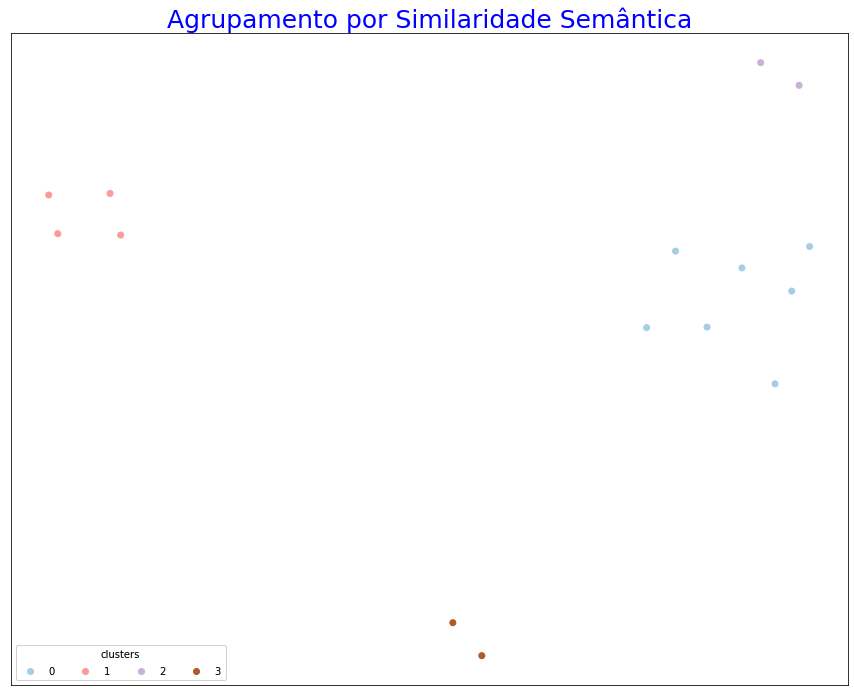

In [73]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline


import umap

# Aplico UMAP a meu Dataset
umap_object = umap.UMAP(n_components=2, n_neighbors=30, min_dist=0.001, metric='euclidean', learning_rate=0.001, repulsion_strength=1, random_state=0)
umap_embeddings = umap_object.fit_transform(corpus_embeddings)

fig, ax = plt.subplots(figsize=(15, 12))
scatter = ax.scatter(umap_embeddings[:,0], umap_embeddings[:,1], c = cluster_assignment, cmap="Paired") 

# Legenda com as cores únicas de nossos clusters
legend1 = ax.legend(*scatter.legend_elements(num=3), ncol=10, loc="lower left", title="clusters")
ax.add_artist(legend1)
ax.set_xticks([])
ax.set_yticks([])

plt.title("Agrupamento por Similaridade Semântica", fontsize=25, color="blue")
plt.show()
